# Heart Failure Project 


## Importing libraries and dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Define the problem - Data Inspection

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB
None


In [8]:
print('Classes and number of values in the dataset',Counter(data['DEATH_EVENT']))

Classes and number of values in the dataset Counter({0: 203, 1: 96})


We can clearly see that the dataset column 'Death Event' is not balanced, the target 1 is like half the target 0

### Creating X and Y, features and target

In [10]:
y = data['DEATH_EVENT']

In [11]:
x = data[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]

### Converting X features to categorical values

In [12]:
x  = pd.get_dummies(x)

### Splitting to train and test

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Scaling the features using standardscaler

In [18]:
ct = ColumnTransformer([("numeric", StandardScaler(), ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])])

In [19]:
X_train = ct.fit_transform(X_train)

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
X_test = ct.transform(X_test)

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


### Preparing the labels for the classification

In [21]:
le = LabelEncoder()

In [22]:
Y_train = le.fit_transform(Y_train.astype(str))
Y_test = le.fit_transform(Y_test.astype(str))

In [23]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### Design the model

In [24]:
model = Sequential()

Designing an input layer with the number of featuers as input

In [25]:
model.add(InputLayer(input_shape=(X_train.shape[1],)))

adding and hidden layer

In [26]:
model.add(Dense(12, activation='relu'))

Output layer with the softmax activation function because we have a classification task, with the number of neurons corresponding to the number of classes

In [27]:
model.add(Dense(2, activation='softmax'))

model compile, loss set equal to categorical crossentropy, optimizer adam and metrcis accuracy

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fitting the model

In [29]:
#model.fit(X_train, Y_train, epochs = 100, batch_size = 16)

Epoch 1/100
14/14 [==============================] - 0s 744us/step - loss: 0.7328 - accuracy: 0.5933
Epoch 2/100
14/14 [==============================] - 0s 655us/step - loss: 0.6997 - accuracy: 0.6555
Epoch 3/100
14/14 [==============================] - 0s 870us/step - loss: 0.6719 - accuracy: 0.7129
Epoch 4/100
14/14 [==============================] - 0s 960us/step - loss: 0.6450 - accuracy: 0.7225
Epoch 5/100
14/14 [==============================] - 0s 907us/step - loss: 0.6223 - accuracy: 0.7321
Epoch 6/100
14/14 [==============================] - 0s 811us/step - loss: 0.6018 - accuracy: 0.7464
Epoch 7/100
14/14 [==============================] - 0s 766us/step - loss: 0.5830 - accuracy: 0.7512
Epoch 8/100
14/14 [==============================] - 0s 815us/step - loss: 0.5646 - accuracy: 0.7560
Epoch 9/100
14/14 [==============================] - 0s 786us/step - loss: 0.5448 - accuracy: 0.7656
Epoch 10/100
14/14 [==============================] - 0s 766us/step - loss: 0.5309 - accura

14/14 [==============================] - 0s 681us/step - loss: 0.2693 - accuracy: 0.8947
Epoch 82/100
14/14 [==============================] - 0s 588us/step - loss: 0.2682 - accuracy: 0.8947
Epoch 83/100
14/14 [==============================] - 0s 637us/step - loss: 0.2676 - accuracy: 0.8947
Epoch 84/100
14/14 [==============================] - 0s 754us/step - loss: 0.2669 - accuracy: 0.8995
Epoch 85/100
14/14 [==============================] - 0s 756us/step - loss: 0.2657 - accuracy: 0.8995
Epoch 86/100
14/14 [==============================] - 0s 690us/step - loss: 0.2649 - accuracy: 0.8947
Epoch 87/100
14/14 [==============================] - 0s 666us/step - loss: 0.2641 - accuracy: 0.8900
Epoch 88/100
14/14 [==============================] - 0s 689us/step - loss: 0.2643 - accuracy: 0.8947
Epoch 89/100
14/14 [==============================] - 0s 658us/step - loss: 0.2632 - accuracy: 0.8947
Epoch 90/100
14/14 [==============================] - 0s 651us/step - loss: 0.2620 - accuracy: 

In [36]:
history = model.fit(X_train, Y_train,
                    validation_split = 0.3,
                    epochs=100, 
                    batch_size=16,
                    )

Epoch 1/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2212 - accuracy: 0.9041 - val_loss: 0.3274 - val_accuracy: 0.8730
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9041 - val_loss: 0.3284 - val_accuracy: 0.8730
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9041 - val_loss: 0.3301 - val_accuracy: 0.8730
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9110 - val_loss: 0.3321 - val_accuracy: 0.8730
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9178 - val_loss: 0.3335 - val_accuracy: 0.8730
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9178 - val_loss: 0.3347 - val_accuracy: 0.8730
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9178 - val_loss: 0.3359 - val_accuracy: 0.8730
Epoch 8/100
1

Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9315 - val_loss: 0.3555 - val_accuracy: 0.8254
Epoch 60/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9315 - val_loss: 0.3555 - val_accuracy: 0.8254
Epoch 61/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.9315 - val_loss: 0.3558 - val_accuracy: 0.8254
Epoch 62/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9315 - val_loss: 0.3562 - val_accuracy: 0.8254
Epoch 63/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9315 - val_loss: 0.3574 - val_accuracy: 0.8254
Epoch 64/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.9315 - val_loss: 0.3588 - val_accuracy: 0.8254
Epoch 65/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9315 - val_loss: 0.3577 - val_accuracy: 0.8254
Epoch 

### Evaluating the model

In [37]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)

In [38]:
print("Loss", loss, "Accuracy:", acc)

Loss 0.6480538249015808 Accuracy: 0.7666666507720947


In [40]:
import matplotlib.pyplot as plt

In [41]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

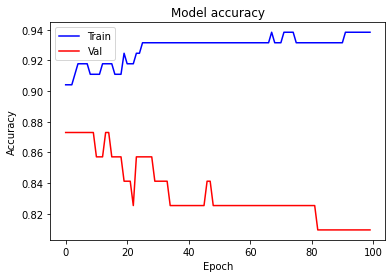

In [42]:
plt.plot(accuracy, 'b')
plt.plot(val_accuracy, 'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

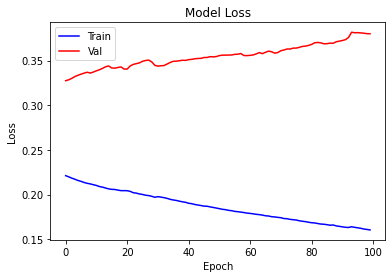

In [43]:
plt.plot(loss, 'b')
plt.plot(val_loss, 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Predictions on the model

In [44]:
y_estimate = model.predict(X_test, verbose=0)

In [45]:
y_estimate = np.argmax(y_estimate, axis=1)

In [46]:
y_true = np.argmax(Y_test, axis=1)

### Printing additional metrics, such as F1_score

In [47]:
print(classification_report(y_true, y_estimate))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        53
           1       0.81      0.57      0.67        37

   micro avg       0.77      0.77      0.77        90
   macro avg       0.78      0.74      0.74        90
weighted avg       0.77      0.77      0.76        90

